In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, accuracy_score, mean_squared_error, classification_report, confusion_matrix
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.calibration import CalibratedClassifierCV
import lightgbm as lgbm
from sklearn.preprocessing import MinMaxScaler, Normalizer
from yellowbrick.model_selection.importances import FeatureImportances
import scikitplot as skplt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import set_dataset as k
import importlib
importlib.reload(k)

<module 'set_dataset' from '/Users/kelvin/GAMES/src/set_dataset.py'>

In [111]:
db = pd.read_csv('db_coef350_xgb100.csv')
x = db.iloc[:, :-1]
y = db.iloc[:, -1]
print(x.shape)
print(y.shape)
print(f'Percentage of Majority Class: {round(y[y==0].count() / y.shape[0]*100, 2)}%')
print(f'Percentage of Minority Class: {round(y[y==1].count() / y.shape[0]*100, 2)}%')
y.value_counts()

(27075, 100)
(27075,)
Percentage of Majority Class: 86.43%
Percentage of Minority Class: 13.57%


0    23401
1     3674
Name: y, dtype: int64

# XGB

## Grid Search 

In [14]:
params = {
        'learning_rate': [0.1, 0.2, 0.3, 0.4],
        'gamma': [0.5, 0.9, 1],
        'min_child_weight': [10, 12],
        'max_depth': [4, 5, 6]
        }

scores = ['precision', 'recall']

x_balance, y_balance = k.balance(x_train, y_train, RandomOverSampler())
model = XGBClassifier()

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    grid = GridSearchCV(model, params, cv=5, scoring='%s_macro' % score)
    grid.fit(x_balance, y_balance)
    print("Best parameters set found on development set:")
    print()
    print(grid.best_params_)
    print("Grid scores on development set:")
    print()
    means = grid.cv_results_['mean_test_score']
    stds = grid.cv_results_['std_test_score']

    for mean, std, params in zip(means, stds, grid.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, grid.predict(x_test)
    print(classification_report(y_true, y_pred))

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'gamma': 0.5, 'learning_rate': 0.4, 'max_depth': 6, 'min_child_weight': 10}
Grid scores on development set:

0.843 (+/-0.007) for {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 10}
0.841 (+/-0.007) for {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 12}
0.851 (+/-0.005) for {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10}
0.850 (+/-0.005) for {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 12}
0.858 (+/-0.004) for {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 10}
0.855 (+/-0.005) for {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 12}
0.853 (+/-0.005) for {'gamma': 0.5, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 10}
0.851 (+/-0.006) for {'gamma': 0.5, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 12}
0.860 (+/-0.004) f

ValueError: Parameter values for parameter (gamma) need to be a sequence(but not a string) or np.ndarray.

In [90]:
params = {
        'learning_rate': [0.3, 0.4],
        'min_child_weight': [10, 12],
        'max_depth': [5, 6]
        }

scores = ['recall']

x_balance, y_balance = k.balance(x_train, y_train, RandomOverSampler())
model = lgbm.LGBMClassifier()

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    grid = GridSearchCV(model, params, cv=5, scoring='%s_macro' % score)
    grid.fit(x_balance, y_balance)
    print("Best parameters set found on development set:")
    print()
    print(grid.best_params_)
    print("Grid scores on development set:")
    print()
    means = grid.cv_results_['mean_test_score']
    stds = grid.cv_results_['std_test_score']

    for mean, std, params in zip(means, stds, grid.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, grid.predict(x_test)
    print(classification_report(y_true, y_pred))

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'learning_rate': 0.4, 'max_depth': 6, 'min_child_weight': 10}
Grid scores on development set:

0.868 (+/-0.005) for {'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 10}
0.865 (+/-0.008) for {'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 12}
0.874 (+/-0.007) for {'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 10}
0.872 (+/-0.005) for {'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 12}
0.871 (+/-0.008) for {'learning_rate': 0.4, 'max_depth': 5, 'min_child_weight': 10}
0.871 (+/-0.009) for {'learning_rate': 0.4, 'max_depth': 5, 'min_child_weight': 12}
0.880 (+/-0.008) for {'learning_rate': 0.4, 'max_depth': 6, 'min_child_weight': 10}
0.877 (+/-0.010) for {'learning_rate': 0.4, 'max_depth': 6, 'min_child_weight': 12}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

          

## HyperParameter Tuning  

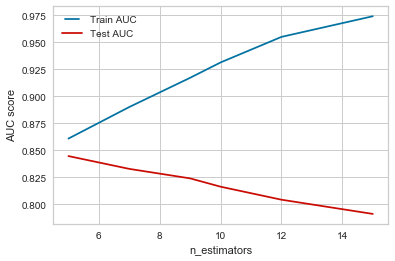

In [4]:
#5 - 6
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

x_train, x_test, y_train, y_test = train_test_split(, y, test_size=0.25, stratify=y)
x_train, y_train = k.balance(x_train, y_train, RandomOverSampler())
n_estimators = [5, 7, 9, 10, 12, 15]
#n_estimators = np.linspace(0.05, 1, 10, endpoint=True)
train_results = []
test_results = []
for estimator in n_estimators:
    model = XGBClassifier(max_depth=estimator)
    #model = XGBClassifier(gamma=estimator, min_child_weight=4, scale_pos_weight=0.14)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

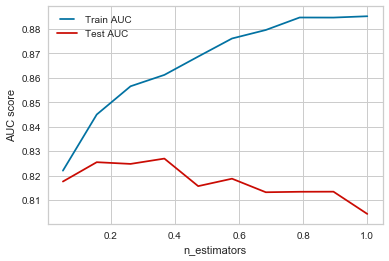

In [52]:
# 0.2 - 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)
x_train, y_train = k.balance(x_train, y_train, RandomOverSampler())
# n_estimators = [5, 7, 9, 10, 12, 15]
n_estimators = np.linspace(0.05, 1, 10, endpoint=True)
train_results = []
test_results = []
for estimator in n_estimators:
    model = XGBClassifier(learning_rate=estimator)
    #model = XGBClassifier(gamma=estimator, min_child_weight=4, scale_pos_weight=0.14)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

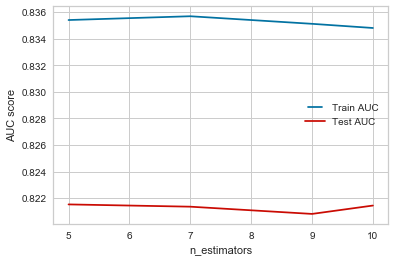

In [51]:
# 9 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)
x_train, y_train = k.balance(x_train, y_train, RandomOverSampler())
n_estimators = [5, 7, 9, 10]
#n_estimators = np.linspace(0.05, 1, 10, endpoint=True)
train_results = []
test_results = []
for estimator in n_estimators:
    model = XGBClassifier(min_child_weight=estimator)
    #model = XGBClassifier(gamma=estimator, min_child_weight=4, scale_pos_weight=0.14)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

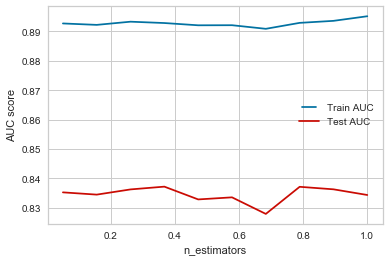

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)
x_train, y_train = k.balance(x_train, y_train, RandomOverSampler())
# n_estimators = [5, 7, 9, 10, 12, 15]
n_estimators = np.linspace(0.05, 1, 10, endpoint=True)
train_results = []
test_results = []
for estimator in n_estimators:
    model = XGBClassifier(learning_rate=0.3, max_depth=5, gamma=estimator)
    #model = XGBClassifier(gamma=estimator, min_child_weight=4, scale_pos_weight=0.14)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

# LightGBM 

In [113]:
params = {
        'learning_rate': [0.3, 0.4],
        'min_child_weight': [10, 12],
        'max_depth': [5, 6],
        'gamma': [0.3, 0.5, 0.7]
        }

scores = ['recall']

x_balance, y_balance = k.balance(x_train, y_train, RandomOverSampler())
model = lgbm.LGBMClassifier()

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    grid = GridSearchCV(model, params, cv=5, scoring='%s_macro' % score)
    grid.fit(x_balance, y_balance)
    print("Best parameters set found on development set:")
    print()
    print(grid.best_params_)
    print("Grid scores on development set:")
    print()
    means = grid.cv_results_['mean_test_score']
    stds = grid.cv_results_['std_test_score']

    for mean, std, params in zip(means, stds, grid.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, grid.predict(x_test)
    print(classification_report(y_true, y_pred))

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'gamma': 0.3, 'learning_rate': 0.4, 'max_depth': 6, 'min_child_weight': 10}
Grid scores on development set:

0.868 (+/-0.007) for {'gamma': 0.3, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 10}
0.869 (+/-0.006) for {'gamma': 0.3, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 12}
0.876 (+/-0.007) for {'gamma': 0.3, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 10}
0.873 (+/-0.009) for {'gamma': 0.3, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 12}
0.872 (+/-0.008) for {'gamma': 0.3, 'learning_rate': 0.4, 'max_depth': 5, 'min_child_weight': 10}
0.870 (+/-0.010) for {'gamma': 0.3, 'learning_rate': 0.4, 'max_depth': 5, 'min_child_weight': 12}
0.880 (+/-0.008) for {'gamma': 0.3, 'learning_rate': 0.4, 'max_depth': 6, 'min_child_weight': 10}
0.878 (+/-0.011) for {'gamma': 0.3, 'learning_rate': 0.4, 'max_depth': 6, 'min_child_weight': 12}
0.868 (+/-0.007) for 